# 1. Linear Regression Numpy Implementation

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y= make_regression(n_samples=100, n_features=1, noise=0.4, bias=50)
# (샘플 개수, feature 수, 노이즈 수치, bias)

In [3]:
X.shape, y.shape

((100, 1), (100,))

In [4]:
def plotLine(theta0, theta1, X, y):
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100


    xplot = np.linspace(min_x, max_x, 1000)
    yplot = theta0 + theta1 * xplot



    plt.plot(xplot, yplot, color='#58b970', label='Regression Line')

    plt.scatter(X,y)
    plt.axis([-10, 10, 0, 200])
    plt.show()

In [5]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x)  # linear regression output을 뱉어준다! f(x) = w1*x + w0

def cost(theta0, theta1, X, y): # cost => loss term => MSE
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2) 
        # 0.5 곱은 없어도 무방. dLoss/dw 계산할 때 2를 없애주기 위해 넣어준 것
    return costValue

def derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    
    '''
    Data: (X, Y)
    y_pred(f(x)): WX + b
    Loss: (y_pred - Y) ** 2 = (WX + b - Y) ** 2
    
    dLoss / dW = 2 * (WX + b - Y) * (X) 인데, 2는 상수니까 생략 
    
    최종적으로 
    dLoss / dW = (WX + b - Y) * X = (y_pred - Y) * X 
    '''
    
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha): # alpha => learning rate 
    dtheta0, dtheta1 = derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [6]:
def LinearRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0: # 100번 마다 중간 결과 출력 
            plotLine(theta0, theta1, X, y)
            print(cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

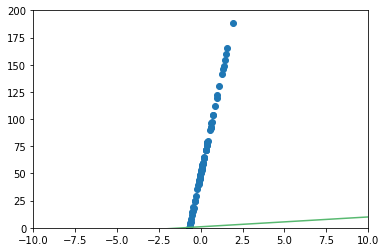

[269076.10423313]


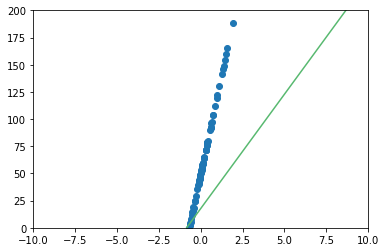

[130485.80604356]


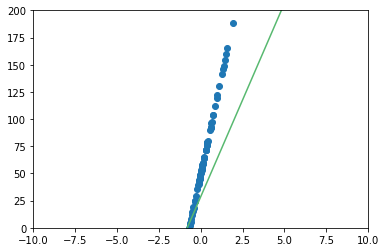

[63789.70847129]


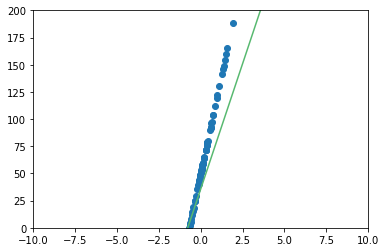

[31372.04611213]


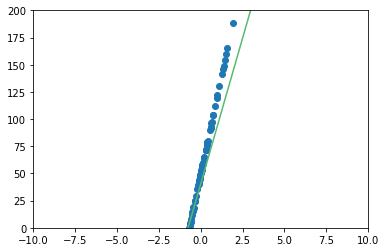

[15497.98291351]


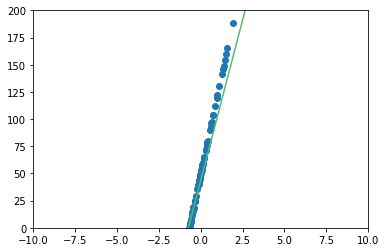

[7682.25192171]


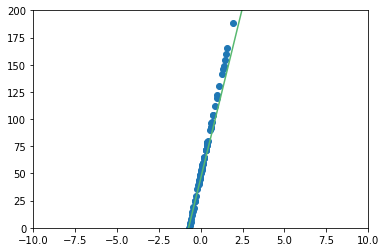

[3818.75339863]


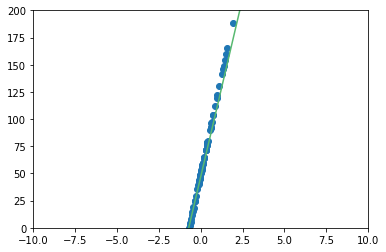

[1903.4336881]


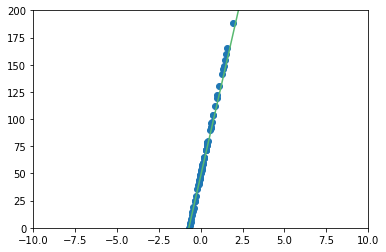

[951.95522631]


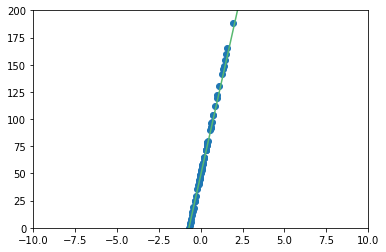

[478.58804031]


In [7]:
LinearRegression(X, y)

# 2. Ridge Regression Numpy Implementation

In [20]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def Ridge_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
        
    penalty = 0.01 * theta1 * theta1
    costValue += penalty
    return costValue

def Ridge_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)
    
    dtheta1 += 0.01 * theta1 # 0.01은 fitting을 위한 람다 값 

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = Ridge_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [21]:
def RidgeRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(Ridge_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

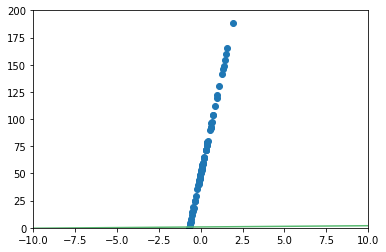

[273526.0009995]


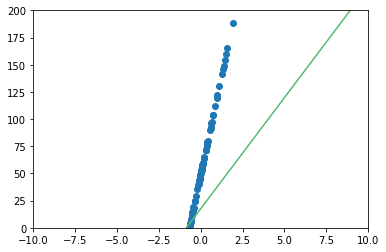

[132909.7862104]


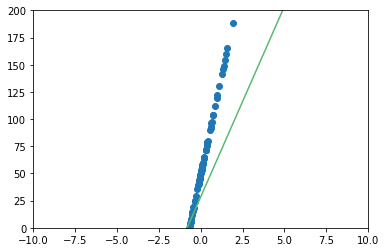

[65327.20011811]


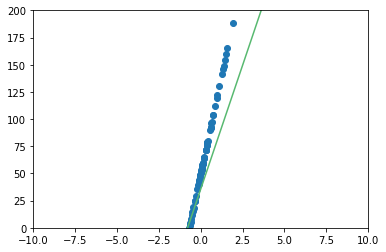

[32476.94698788]


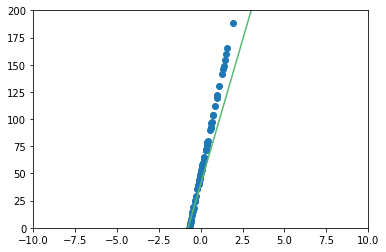

[16349.67425969]


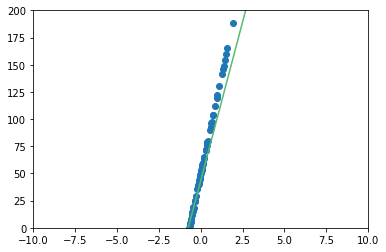

[8357.34680247]


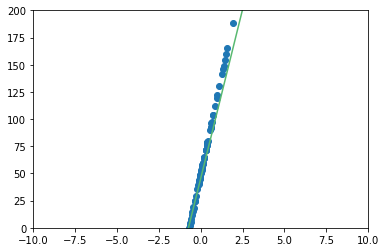

[4357.74428831]


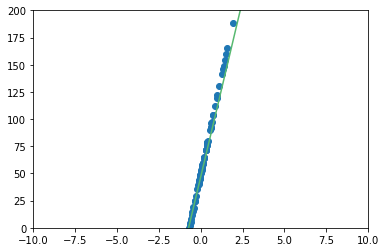

[2334.20872338]


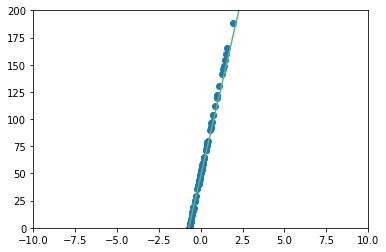

[1297.0270649]


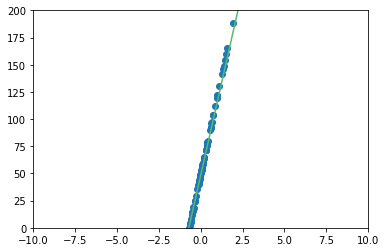

[756.88499234]


In [22]:
RidgeRegression(X, y)

# 3. Lasso Regression Numpy Implementation

In [23]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def Lasso_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
        
    costValue += 0.01 * np.abs(theta1)
    return costValue

def Lasso_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    
    '''
    f(X) = |X| = X if X >= 0
         = |X| = -X if X < 0
         
    따라서, 
    df(X) / dx = 1     if X > 0
    df(X) / dx = 0     if x = 0 # 하지만 0이 나올 확률은 거의 없음... 
    df(X) / dx = -1    if X < 0
    '''
    
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)
    
    # 절대값이므로 양수, 음수일 때를 나눠주자 
    if theta1 >= 0: 
        dtheta1 += 0.01
    else: 
        dtheta1 += -0.01

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = Lasso_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [24]:
def LassoRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(Lasso_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

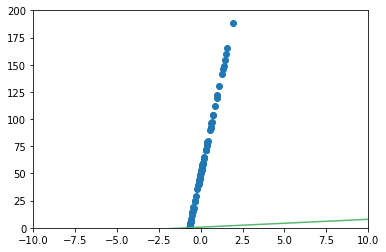

[271384.01272521]


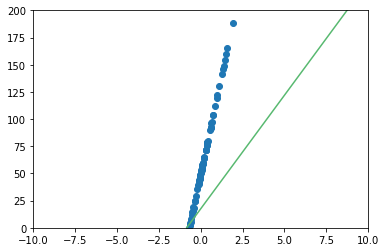

[131559.88975341]


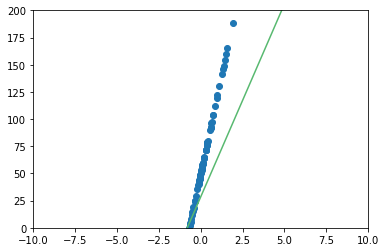

[64304.1619131]


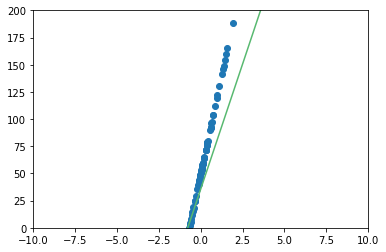

[31625.39193161]


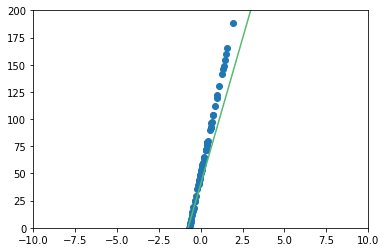

[15626.27868878]


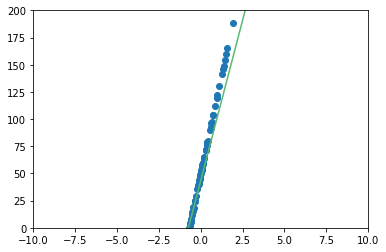

[7749.17305464]


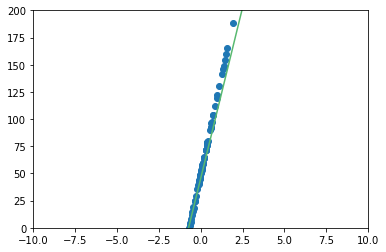

[3854.82564898]


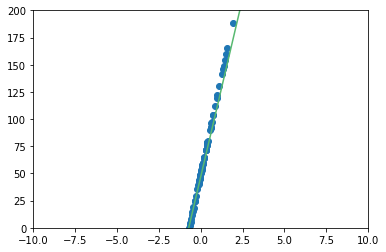

[1923.61937594]


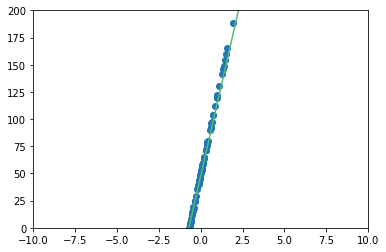

[963.74615813]


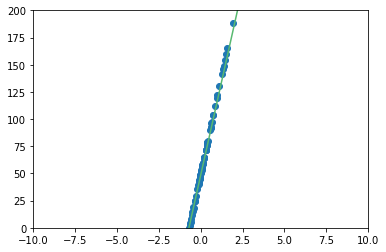

[485.81734553]


In [25]:
LassoRegression(X, y)

# 4. ElasticNet Numpy Implementation  (HW1)

In [29]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def EN_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
        
    costValue += 0.01 * theta1 * theta1 # Ridge
    costValue += 0.01 * np.abs(theta1) # Lasso. 한 줄에 이어써도 무방 
    return costValue

def EN_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)
    
    dtheta1 += 2 * 0.01 * theta1 # Ridge
    
    # Lasso 
    if theta1 >= 0: 
        dtheta1 += 0.01 * 1
    else: 
        dtheta1 += 0.01 * (-1)

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = EN_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [30]:
def ENRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(EN_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

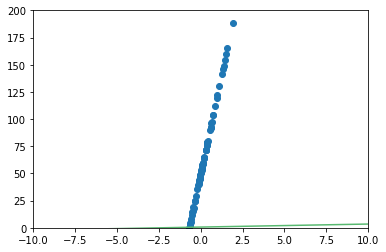

[273205.06739427]


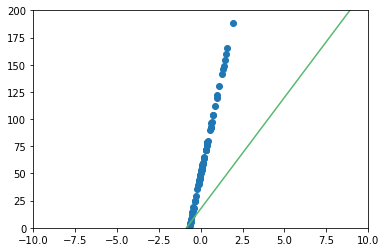

[132879.06311496]


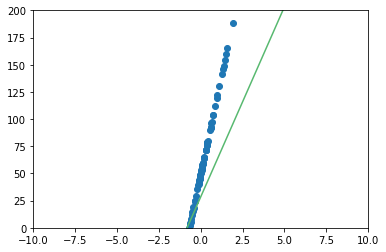

[65609.61922185]


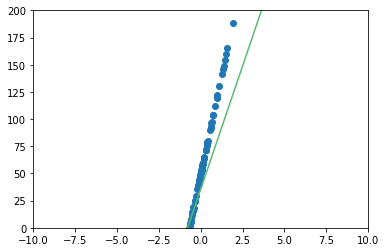

[32939.04522643]


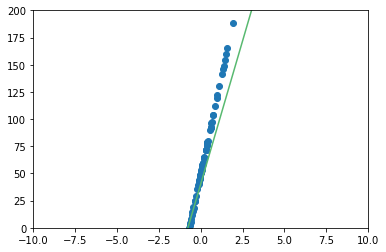

[16869.22599313]


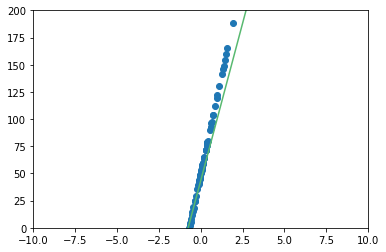

[8858.44582515]


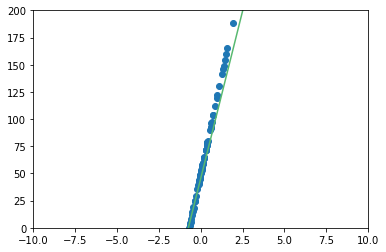

[4804.38167802]


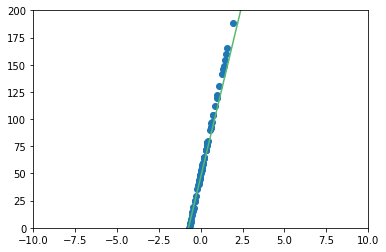

[2715.93089769]


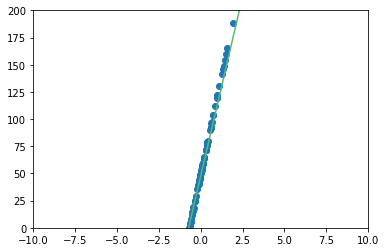

[1616.97205453]


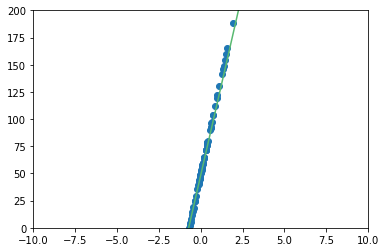

[1023.99504192]


In [31]:
ENRegression(X, y)